In [23]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [24]:
df = pd.read_csv("data/Allstorms.ibtracs_wmo.v03r05.csv")

In [25]:
df[df.columns[[0,1,3,8,9]]].head()

,Serial_Num,Season,Basin,Latitude,Longitude
0,1848011S09080,1848,SI,-8.6,79.8
1,1848011S09080,1848,SI,-9.0,78.9
2,1848011S09080,1848,SI,-10.4,73.2
3,1848011S09080,1848,SI,-12.8,69.9
4,1848011S09080,1848,SI,-13.9,68.9


In [26]:
dfs = df.groupby('Serial_Num')

In [27]:
pos = dfs[['Latitude', 'Longitude']].mean()

In [28]:
y, x = pos.values.T

In [29]:
pos.head()

,Latitude,Longitude
Serial_Num,,
1848011S09080,-15.918182,71.854545
1848011S15057,-24.116667,52.016667
1848061S12075,-20.528571,65.342857
1851080S15063,-17.325000,55.400000
1851080S21060,-23.633333,60.200000


/home/matsumoto/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


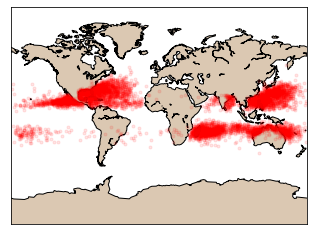

In [30]:
m = Basemap(projection='mill', llcrnrlat=-65, urcrnrlat=85, llcrnrlon=-180)
x0, y0 = m(-180, -65)
x1, y1 = m(180, 85)
m.drawcoastlines()
m.fillcontinents(color='#dbc8b2')
xm, ym=m(x, y)
m.plot(xm, ym, '.r', alpha=.1)

In [31]:
h = np.vstack((xm, ym))
kde = st.gaussian_kde(h)

In [43]:
k = 50
tx, ty = np.meshgrid(
    np.linspace(x0, x1, 2*k), 
    np.linspace(y0, y1, k))
v = kde(np.vstack((tx.ravel(), ty.ravel()))).reshape((k, 2*k))

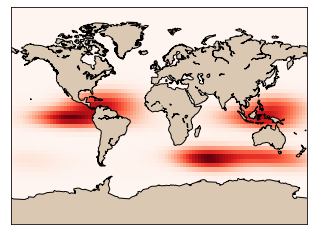

In [45]:
m.drawcoastlines()
m.fillcontinents(color='#dbc8b2')
xm, ym = m(x, y)
m.imshow(v, origin='lower', extent=[x0,x1,y0,y1], cmap=plt.get_cmap('Reds'))